Internet Resources:

[Python Programming.net - machine learning episodes 34-38](https://pythonprogramming.net/machine-learning-clustering-introduction-machine-learning-tutorial/)

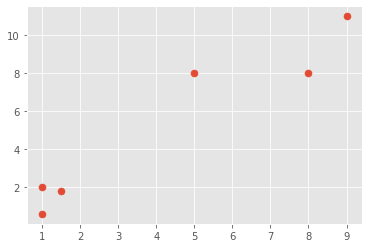

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

colors = 10*["g","r","c","b","k"]

plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

The objective is to find k different clusters. K means uses an iterative alogirthm


 **Training Algorithm:** 

	1. Pick K random points (=initial K means)
	
    Repeat steps 2 & 3 for fixed amount of iterations or until optimization threshold is reached:
        2. For every data point:
            1. Take distance to each Mean
            2. Nearest Mean is the data-points classification
		
        3. For every Mean:
            new mean = mean of all data-points classified as belonging to this mean
<br>

**Prediction  Function:**

	1. Take distance of data-point to all k Means  
    2. Data-point is assigned class of the nearest mean

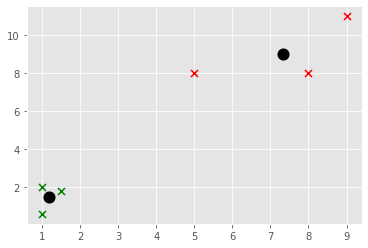

In [2]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol # if mean moves less than this distance per training step, we are done training
        self.max_iter = max_iter # max iteration
        
        
    def fit(self,data):
        self.centroids = {}
        
        #  step 1: initilize random k means
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        
        for i in range(self.max_iter):
            
            # stores which class each sample belongs to e.g {0: [sample1,sample2,..], 1:[sample3,..], 2[..], ..}
            self.classifications = {i:[] for i in range(self.k)} 
            
            # step 2: for every data point
            for sample in data:
                # step 2.1: take distance between data point and centroids 
                distances = [np.linalg.norm(sample-self.centroids[centroid]) for centroid in self.centroids]
                # step 2.2: classification of datapoint is the nearest centroid (i-th position in distances means i-th centroid)
                classification = distances.index(min(distances))
                self.classifications[classification].append(sample)
            
            # we need to store previous centroids so we know when we have reached optimization threshold
            prev_centroids = dict(self.centroids)
            
            # step 3: calculate new means
            for classification in self.classifications:
                 self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            
            # check if have reached optimization threshold
            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
            
            if optimized:
                break
    
    def predict(self,data):
        # calculate distances
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        # classifaction is that of nearest mean
        classification = distances.index(min(distances))
        return classification
    
    
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=50, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=50, linewidths=5)
        
plt.show()